<a href="https://colab.research.google.com/github/victorsantanaa/imersaoDadosAlura/blob/main/Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.gridspec as gridspec
import numpy as np

 
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
 
dados = pd.read_csv(fonte)
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

In [3]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

In [4]:
x = notas_entrada
y = notas_saida 

In [5]:
from sklearn.model_selection import train_test_split
train_test_split(x,y)

[        NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_CN  NU_NOTA_REDACAO
 22205        583.5       543.6       506.9            580.0
 106928       529.8       549.1       471.2            600.0
 107269       358.9       443.5       504.5            580.0
 24057        387.8       458.2       408.1            440.0
 4031         486.5       546.6       570.5            820.0
 ...            ...         ...         ...              ...
 59211        452.8       524.2       429.4            460.0
 105611       584.2       566.2       503.5            520.0
 103204       401.9       437.5       406.6            180.0
 47761        485.6       440.7       424.5            580.0
 103457       358.7       386.3       444.3            400.0
 
 [69402 rows x 4 columns],
         NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_CN  NU_NOTA_REDACAO
 51677        444.8       333.0       430.8            600.0
 43771        470.2       428.8       397.2            600.0
 70675        501.7       528.6       507.9            5

In [6]:
SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)


In [7]:
x_treino.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
90200,567.7,523.2,542.7,660.0
12375,497.1,423.0,445.2,580.0
46320,494.0,528.5,454.0,520.0
111208,561.9,572.7,385.8,640.0
75943,686.5,646.5,625.7,900.0


In [8]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [9]:
predicoes_matematica = modelo.predict(x_teste)

In [10]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

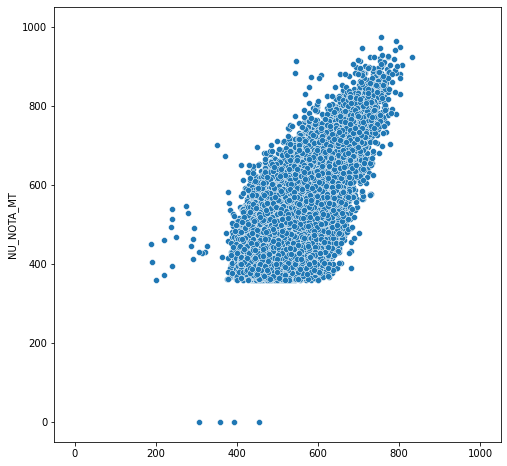

In [11]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

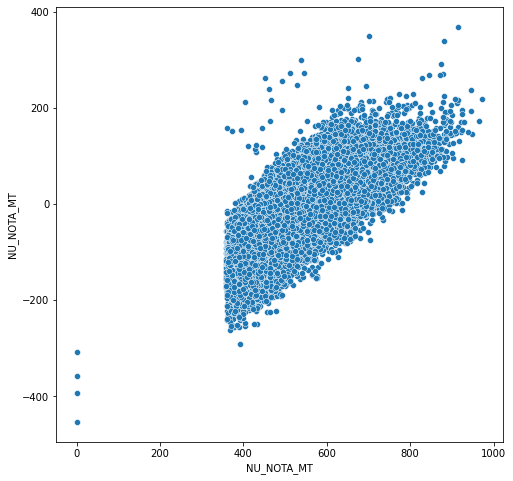

In [12]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)

(-50.0, 1050.0)

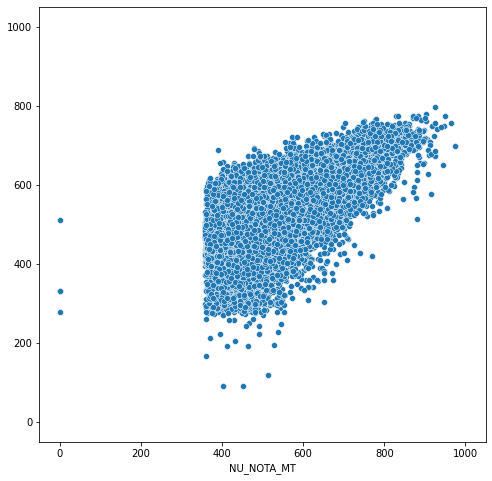

In [13]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [ ]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [ ]:
resultados["quadrado_diferenca"].mean()

In [ ]:
resultados["quadrado_diferenca"].mean()**(1/2)

In [ ]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

In [ ]:
mean_squared_error(y_teste, predicoes_matematica)

Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

Desafio02: Ler a documentação do Dummy e alterar o método de regressão

Desafio03: Buscar outra métrica para avaliar modelos de regressão